# Tutorial: Fréchet Mean and Tangent PCA

This notebook shows how to compute the Fréchet mean of a data set.
Then it performs tangent PCA at the mean.

## Setup

In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

import geomstats.backend as gs

from geomstats.visualization import Sphere, PoincareDisk
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

INFO: Using numpy backend


## On the sphere

### Generate data on the sphere

In [3]:
from geomstats.geometry.hypersphere import Hypersphere

s2 = Hypersphere(dim=2)
data = s2.random_von_mises_fisher(kappa=15, n_samples=140)

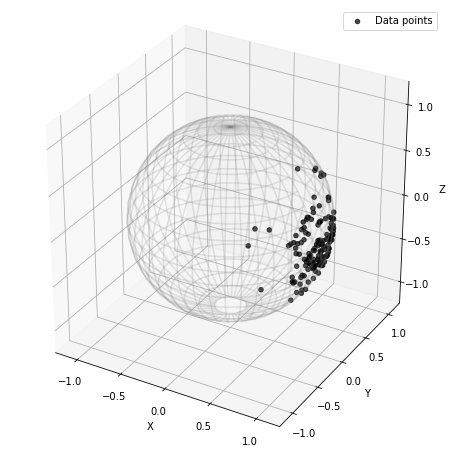

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection= '3d')
sphere = Sphere()
sphere.plot(data, ax=ax, color='black', alpha=0.7, label='Data points')
ax.set_box_aspect([1, 1, 1])
ax.legend();

### Fréchet mean

We compute the Fréchet mean of the simulated data points.

In [5]:
mean = FrechetMean(metric=s2.metric)
mean.fit(data)

mean_estimate = mean.estimate_

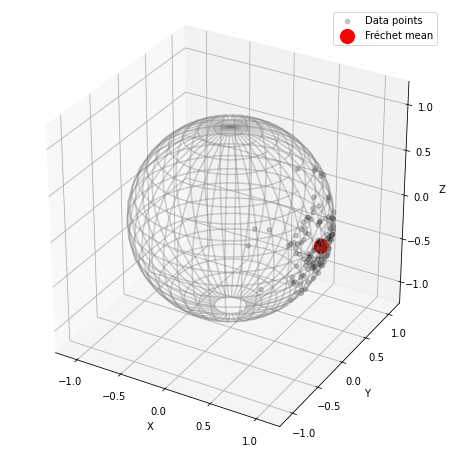

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection= '3d')
sphere.plot(data, ax=ax, color='black', alpha=0.2, label='Data points')
sphere.plot(gs.array([mean_estimate]), ax=ax, color='red', s=200, label='Fréchet mean')
ax.set_box_aspect([1, 1, 1])
ax.legend();

### Tangent PCA (at the Fréchet mean)

We perform tangent PCA at the Fréchet mean, with two principal components.

In [7]:
tpca = TangentPCA(metric=s2.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

We compute the geodesics on the sphere corresponding to the two principal components.

In [8]:
geodesic_0 = s2.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = s2.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t) 

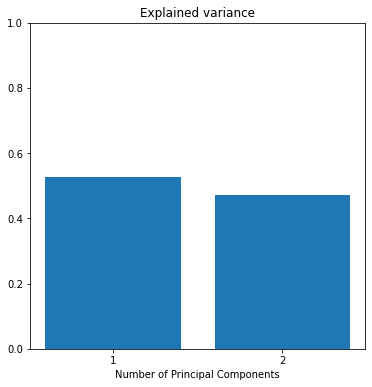

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_);

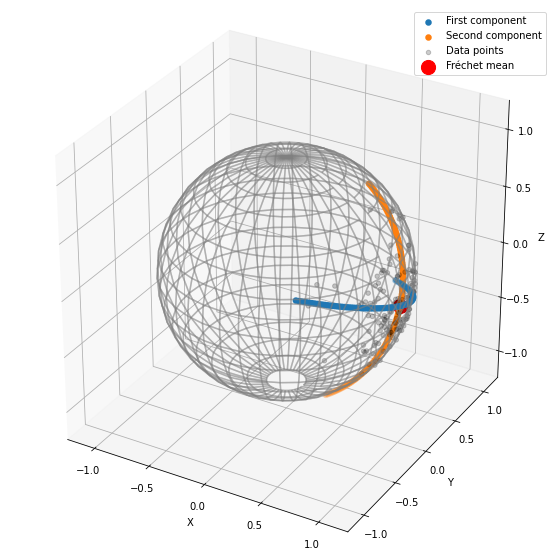

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

sphere.plot(
    geodesic_points_0, ax, space='S2', linewidth=2, label='First component')
sphere.plot(
    geodesic_points_1, ax, space='S2', linewidth=2, label='Second component')
sphere.plot(
    data, ax, space='S2', color='black', alpha=0.2, label='Data points')
sphere.plot(
    gs.array([mean_estimate]), ax, space='S2', color='red', s=200, label='Fréchet mean')
ax.legend()
ax.set_box_aspect([1, 1, 1])
plt.show()

## In the Hyperbolic plane

### Generate data on the hyperbolic plane

In [11]:
from geomstats.geometry.hyperboloid import Hyperboloid

hyperbolic_plane = Hyperboloid(dim=2)

data = hyperbolic_plane.random_point(n_samples=140)

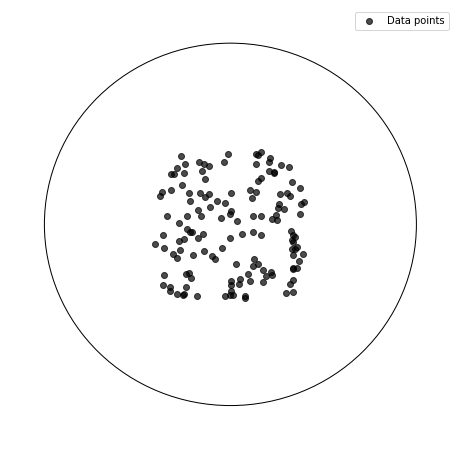

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
poincare_disk = PoincareDisk()
poincare_disk.plot(data, ax,  color='black', alpha=0.7, label='Data points')
ax.legend();

### Fréchet mean

We compute the Fréchet mean of the data points.

In [13]:
mean = FrechetMean(metric=hyperbolic_plane.metric)
mean.fit(data)

mean_estimate = mean.estimate_

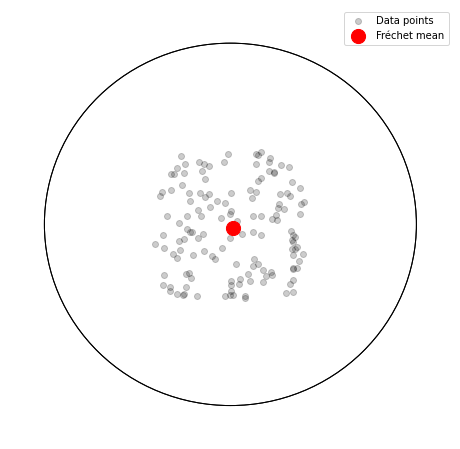

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

poincare_disk.plot(data, ax, color='black', alpha=0.2, label='Data points')
poincare_disk.plot(gs.array([mean_estimate]), ax, color='red', s=200, label='Fréchet mean')

ax.legend();

### Tangent PCA (at the Fréchet mean)

We perform tangent PCA at the Fréchet mean.

In [19]:
tpca = TangentPCA(metric=hyperbolic_plane.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

We compute the geodesics corresponding to the first components of the tangent PCA.

In [20]:
geodesic_0 = hyperbolic_plane.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = hyperbolic_plane.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t) 

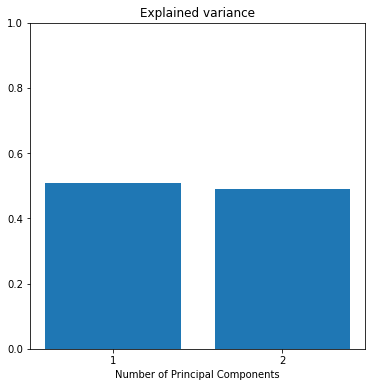

In [21]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_);

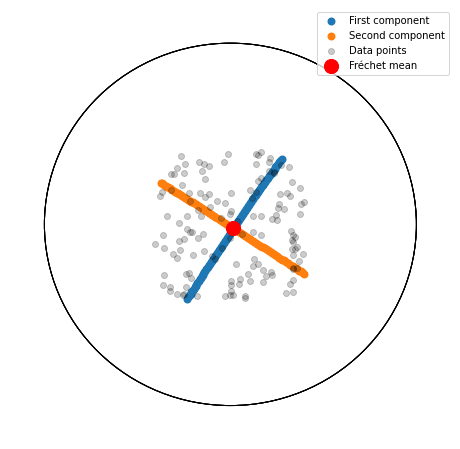

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

poincare_disk.plot(
    geodesic_points_0, ax, space='H2_poincare_disk', linewidth=2, label='First component')
poincare_disk.plot(
    geodesic_points_1, ax, space='H2_poincare_disk', linewidth=2, label='Second component')
poincare_disk.plot(
    data, ax, space='H2_poincare_disk', color='black', alpha=0.2, label='Data points')
poincare_disk.plot(
    gs.array([mean_estimate]), ax, space='H2_poincare_disk', color='red', s=200, label='Fréchet mean')
ax.legend()
plt.show()